In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [26]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [46]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [50]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Text(0, 0.5, '')

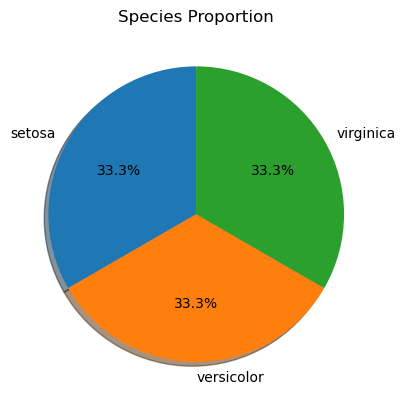

In [134]:
df['species'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Species Proportion')
plt.ylabel('')


Text(0.5, 0.98, 'Histograms of all Features')

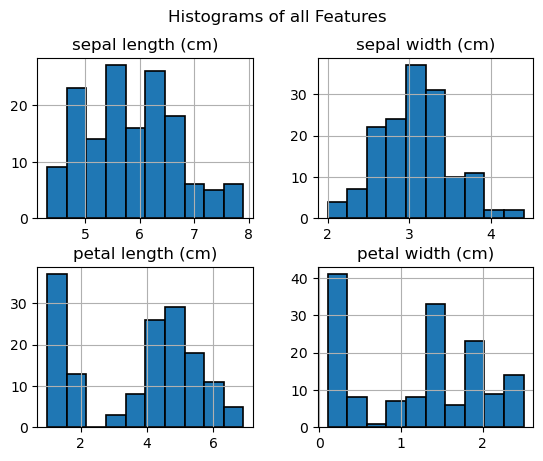

In [104]:
#Univariate Analysis 
df.hist(edgecolor='black', linewidth=1.2)
plt.suptitle('Histograms of all Features')


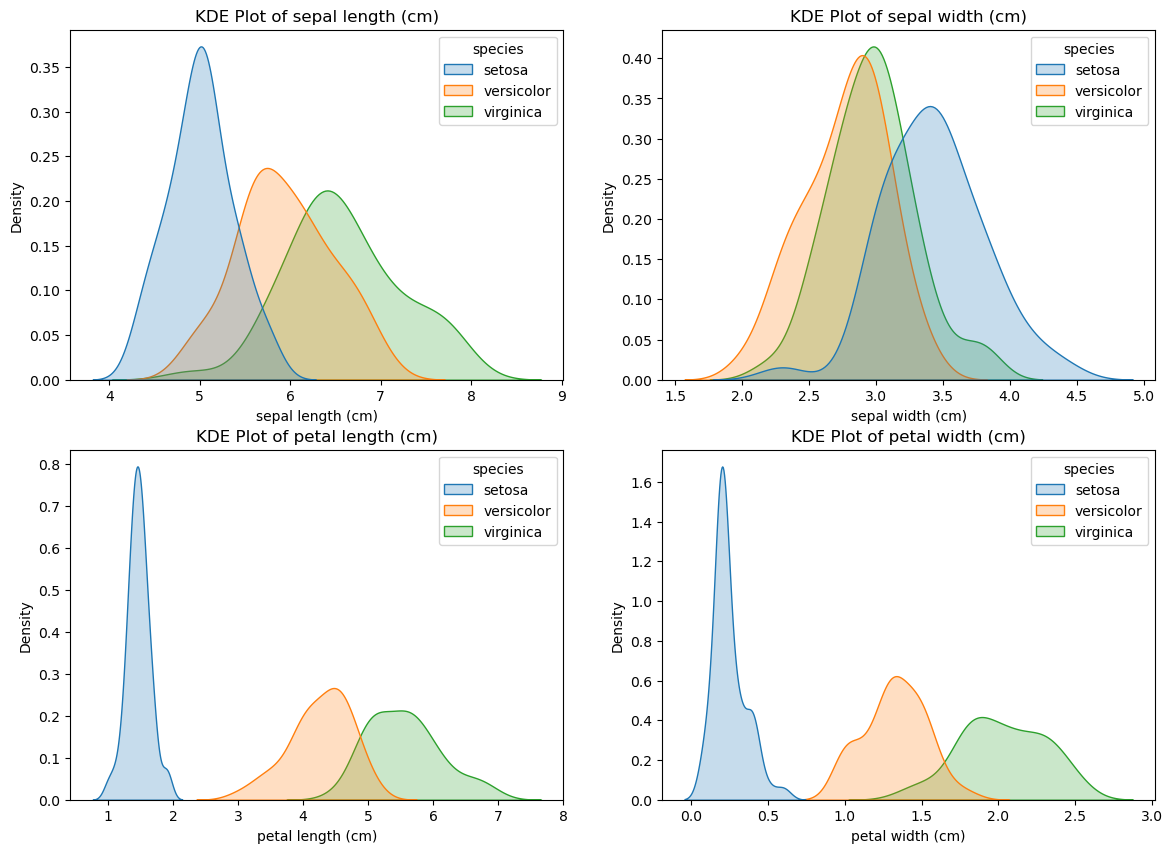

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(iris.feature_names):
    sns.kdeplot(data=df, x=col, hue='species', fill=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {col}')


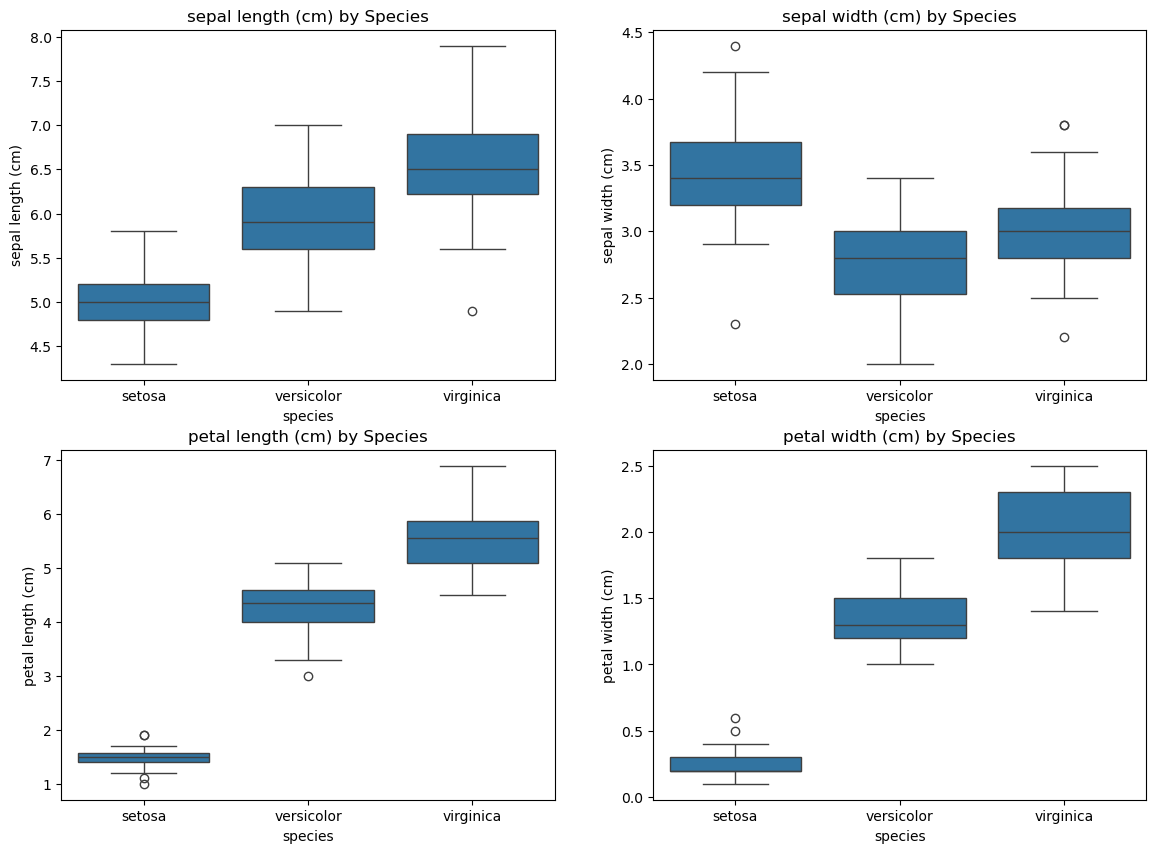

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(iris.feature_names):
    sns.boxplot(x='species', y=col, data=df,ax=axes[i])
    axes[i].set_title(f'{col} by Species')
plt.show()


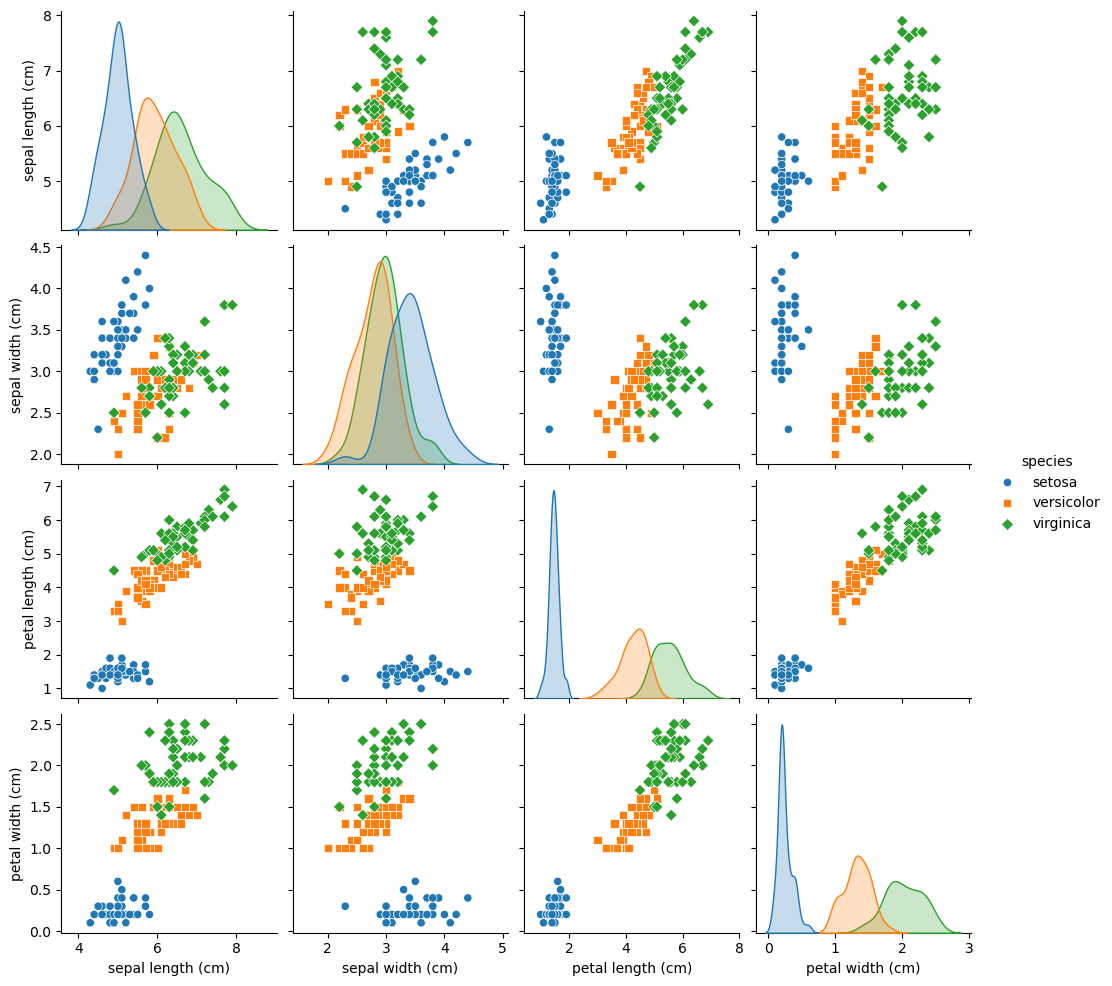

In [112]:
#--->Bivariate Analysis
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])


<Axes: >

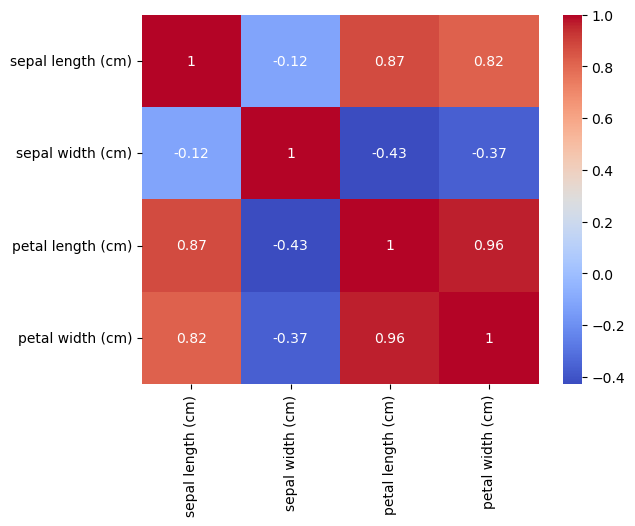

In [110]:
#--->MultiVariate Analysis
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
